# 1st LPF in Continuous System

In [12]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
def toHz(value):
    from numpy import pi
    return value/2/pi

In [6]:
f_cut = 1000
w_cut = 2*np.pi*f_cut

In [44]:
num_L1 = np.array([w_cut])
den_L1 = np.array([1., w_cut])
s_L1 = sig.lti(num_L1, den_L1)
w_L1, m_L1, P_L1 = sig.bode(s_L1)

num_H1 = np.array([1., 0.])
den_H1 = np.array([1., w_cut])
s_H1 = sig.lti(num_H1, den_H1)
w_H1, m_H1, P_H1 = sig.bode(s_H1)

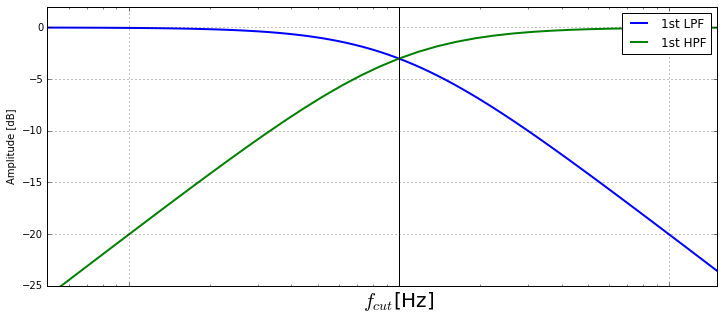

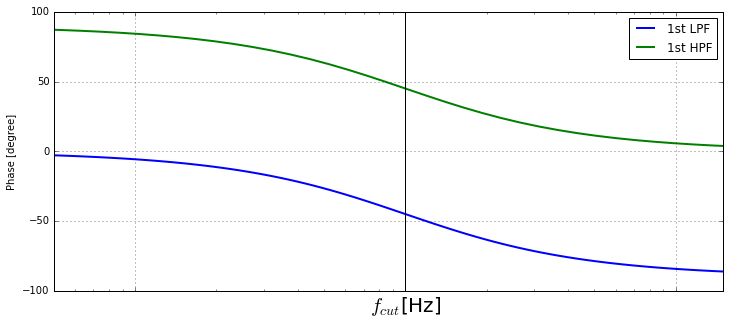

In [70]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L1), m_L1, lw=2, label='1st LPF')
plt.semilogx(toHz(w_H1), m_H1, lw=2, label='1st HPF')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylim(-25, 2)
plt.ylabel('Amplitude [dB]')
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.legend()
plt.grid()

plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L1), P_L1, lw=2, label='1st LPF')
plt.semilogx(toHz(w_H1), P_H1, lw=2, label='1st HPF')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylabel('Phase [degree]')
plt.legend()
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.grid()

plt.show()

# Digital Filter Design

In [90]:
def get1stFilterCoeffi(f_cut, ts, isLPF):
    from numpy import pi
    
    w_cut = 2*pi*f_cut
    tau = 1/w_cut
    
    tau_ts = 1/(tau+ts)
    if isLPF=='LPF':
        return -tau*tau_ts, ts*tau_ts, 0
    elif isLPF=='HPF':
        return -tau*tau_ts, tau*tau_ts, -tau*tau_ts

In [78]:
def direct2FormModel(data, a1, a2, b0, b1, b2):
    from numpy import zeros, arange
    
    result = zeros((len(data),))
    timeZone = zeros((len(data),))
    
    for n in arange(2, len(data)):
        sum0 = -a1*timeZone[n-1] - a2*timeZone[n-2]
        timeZone[n] = data[n] + sum0
        result[n] = b0*timeZone[n] + b1*timeZone[n-1] + b2*timeZone[n-2]
        
    return result

In [79]:
def d2f_1st(data, a1, b0, b1):
    return direct2FormModel(data, a1, 0, b0, b1, 0)

In [81]:
get1stFilterCoeffi(100, 1/1000, 1)

(-0.6141304549049624, 0.38586954509503757, 0)

In [82]:
get1stFilterCoeffi(100, 1/1000, 0)

(-0.6141304549049624, 0.6141304549049624, -0.6141304549049624)

# Simulation 1st order LPF/HPF in continuous system

In [73]:
def draw_FFT_Graph(data, fs, **kwargs):
    from numpy.fft import fft
    import matplotlib.pyplot as plt
    
    graphStyle = kwargs.get('style', 0)
    xlim = kwargs.get('xlim', 0)
    ylim = kwargs.get('ylim', 0)
    title = kwargs.get('title', 'FFT result')
    
    n = len(data)
    k = np.arange(n)
    T = n/Fs
    freq = k/T 
    freq = freq[range(int(n/2))]
    FFT_data = fft(data)/n 
    FFT_data = FFT_data[range(int(n/2))]
    
    plt.figure(figsize=(12,5))
    if graphStyle == 0:
        plt.plot(freq, abs(FFT_data), 'r', linestyle=' ', marker='^') 
    else:
        plt.plot(freq,abs(FFT_data),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.vlines(freq, [0], abs(FFT_data))
    plt.title(title)
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

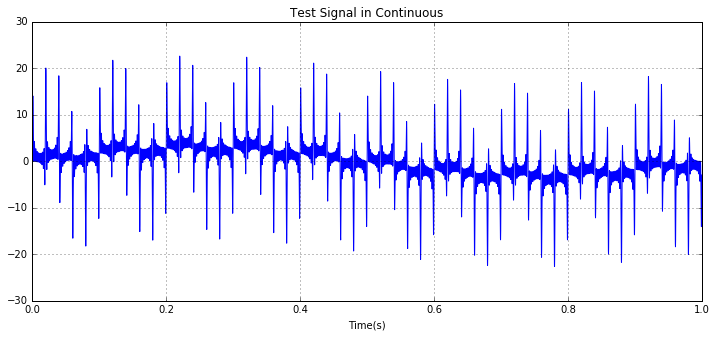

In [72]:
# Create Test Signal
Fs = 10*10**3               # 10kHz
Ts = 1/Fs                   # sample Time
endTime = 1
t = np.arange(0.0, endTime, Ts)

inputSig = 3.*np.sin(2.*np.pi*t)

sampleFreq = np.arange(10,500,50)

for freq in sampleFreq:
    inputSig = inputSig + 2*np.sin(2*np.pi*freq*t)
    
plt.figure(figsize=(12,5))
plt.plot(t, inputSig)
plt.xlabel('Time(s)')
plt.title('Test Signal in Continuous')
plt.grid(True)
plt.show()

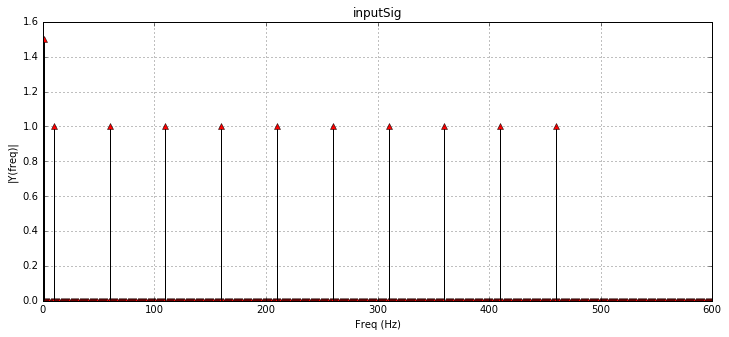

In [76]:
draw_FFT_Graph(inputSig, Fs, title='inputSig', xlim=(0, 600))

In [91]:
a1, b0, b1 = get1stFilterCoeffi(200, Ts, 'LPF')
dataLPF = d2f_1st(inputSig, a1, b0, b1)

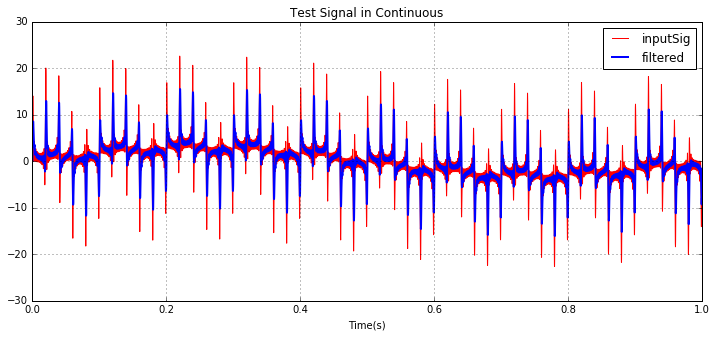

In [92]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='inputSig')
plt.plot(t, dataLPF, lw=2, label='filtered')
plt.xlabel('Time(s)')
plt.title('Test Signal in Continuous')
plt.legend()
plt.grid(True)
plt.show()

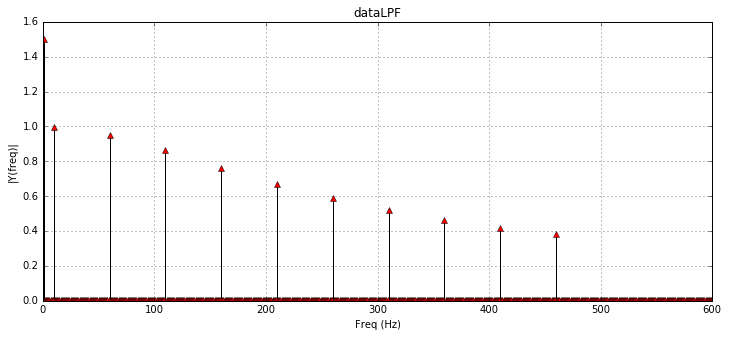

In [93]:
draw_FFT_Graph(dataLPF, Fs, title='dataLPF', xlim=(0, 600))

In [104]:
20*np.log10(0.7/1.0)

-3.0980391997148637

In [95]:
a1, b0, b1 = get1stFilterCoeffi(200, Ts, 'HPF')
dataHPF = d2f_1st(inputSig, a1, b0, b1)

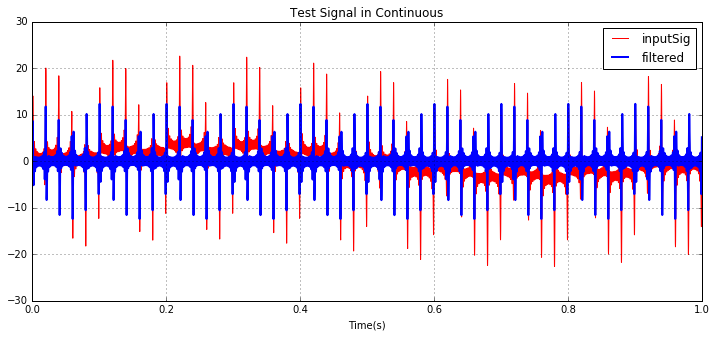

In [96]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='inputSig')
plt.plot(t, dataHPF, lw=2, label='filtered')
plt.xlabel('Time(s)')
plt.title('Test Signal in Continuous')
plt.legend()
plt.grid(True)
plt.show()

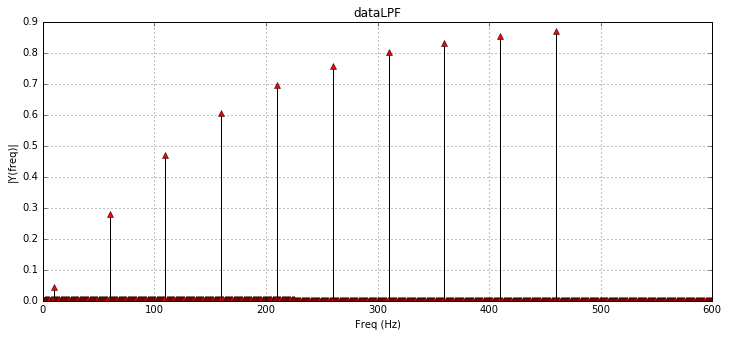

In [97]:
draw_FFT_Graph(dataHPF, Fs, title='dataLPF', xlim=(0, 600))